# Context:
The data set has information about features of silhouette extracted from the images of different cars
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 
cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars 
would be readily distinguishable, but it would be more difficult to distinguish between the cars.

Here let's apply Hierarchial Clustering

### Import libraries and Read the dataset using function .dropna() - to avoid dealing with NAs

In [73]:
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

In [74]:
df = pd.read_csv('vehicle-1.csv').dropna()

In [75]:
df.shape

(813, 19)

In [76]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

### Print/ Plot the dependent (categorical variable) and Check for any missing values in the data

In [78]:
df['class'].value_counts(normalize=True)

car    0.507995
bus    0.252153
van    0.239852
Name: class, dtype: float64

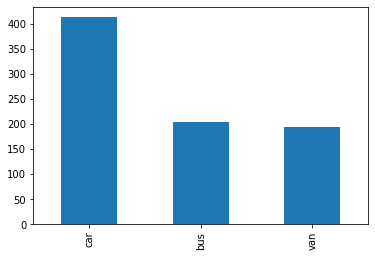

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(df["class"]).plot(kind="bar")

In [80]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### KDE plot for all the features to see how many of it can show separate clusters.

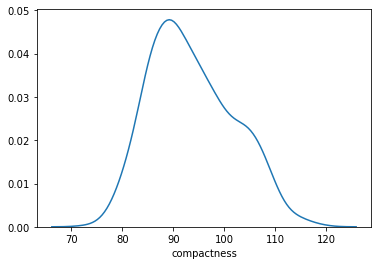

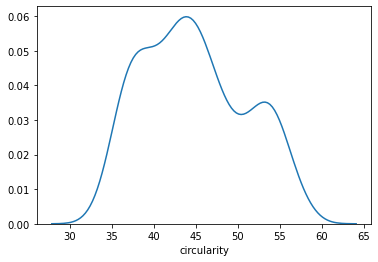

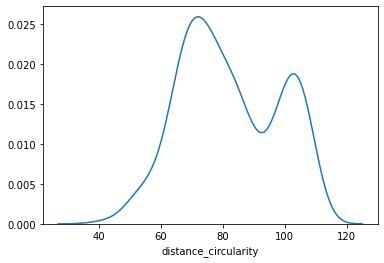

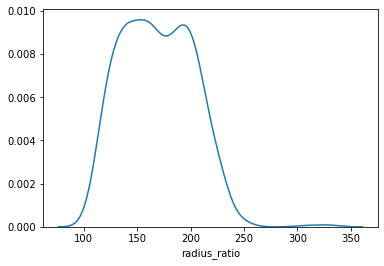

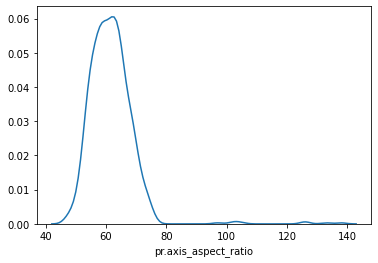

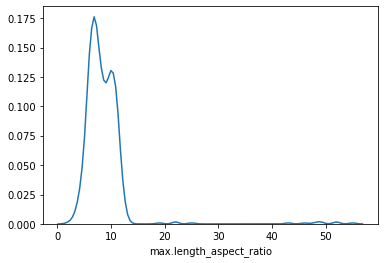

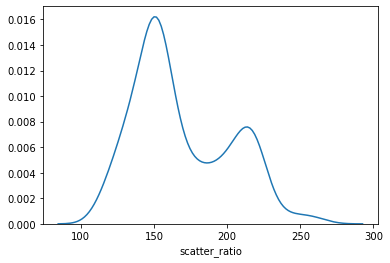

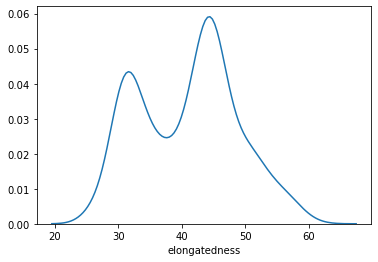

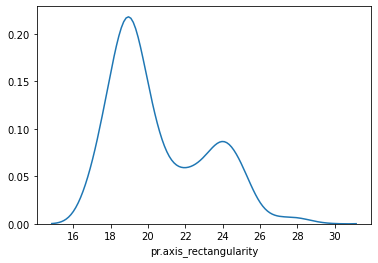

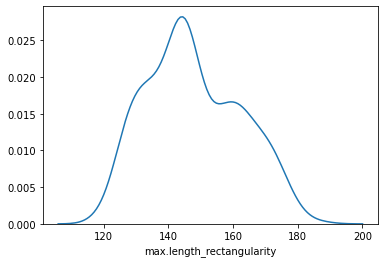

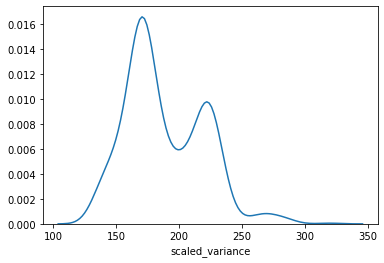

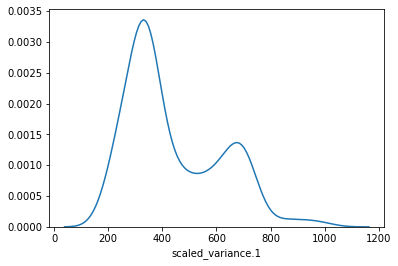

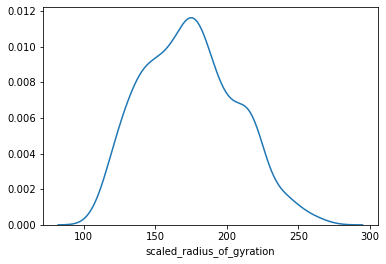

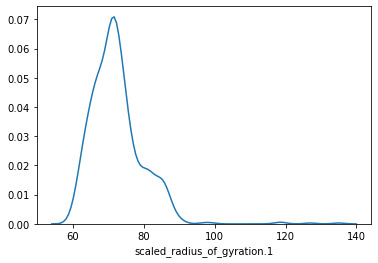

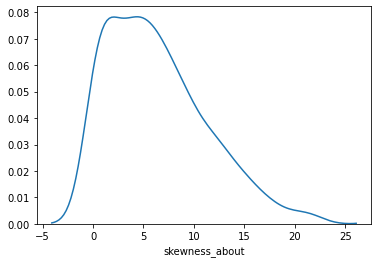

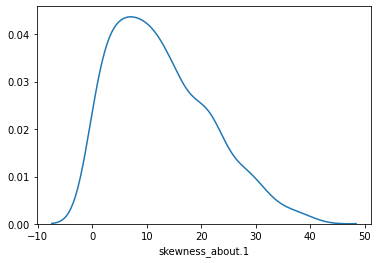

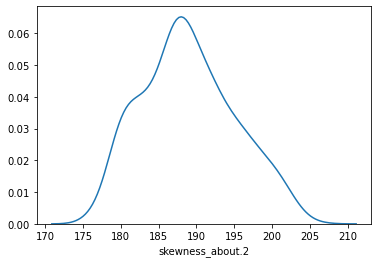

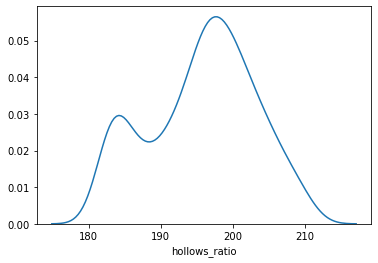

In [81]:
import seaborn as sns

for i in df.columns[df.columns!='class']:
    sns.distplot(df[i],hist=False,)
    plt.show()

### Standardize the data

In [82]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [ ]:
df = df[df['pr.axis_aspect_ratio']<80]
df = df[df['scaled_radius_of_gyration.1']<100]
df = df[df['max.length_aspect_ratio']<15]

In [ ]:
# Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 
#go for any clustering methods. You can use zscore function to do this

In [ ]:
#outliers removal second try

In [83]:
interest_df = df.drop('class', axis=1)

In [84]:
#method 1
from scipy.stats import zscore
interest_df_z = interest_df.apply(zscore)

In [85]:
interest_df_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [86]:
# or
# method 2
# you could use any
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(interest_df),columns=interest_df.columns)

In [87]:
X_std.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [88]:
X_std.shape

(813, 18)

### Find out the linkage matrix

In [ ]:
#Use ward as linkage metric and distance as Eucledian

In [96]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

linkage_method = []
score = []
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(X_std)
df['labels_ward'] = model.labels_
#linkage.append('ward')
#score.append(silhouette_score(X_std, model.labels_))
silhouette_score(X_std, model.labels_)

0.28179608835780284

In [97]:
df['labels_ward'].value_counts()

1    358
0    274
2    173
3      8
Name: labels_ward, dtype: int64

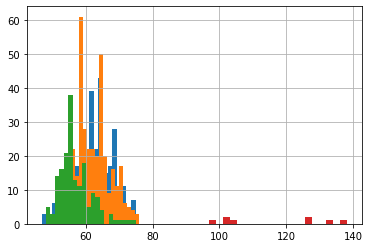

In [99]:
df.loc[df['labels_ward']==0, 'pr.axis_aspect_ratio'].hist(bins=20)
df.loc[df['labels_ward']==1, 'pr.axis_aspect_ratio'].hist(bins=20)
df.loc[df['labels_ward']==2, 'pr.axis_aspect_ratio'].hist(bins=20)
df.loc[df['labels_ward']==3, 'pr.axis_aspect_ratio'].hist(bins=20)

In [ ]:
df.loc[df['labels_ward']==0, 'class'].value_counts(normalize=True)

In [ ]:
df.loc[df['labels_ward']==1, 'class'].value_counts(normalize=True)

In [ ]:
df.loc[df['labels_ward']==2, 'class'].value_counts(normalize=True)

In [ ]:
df.loc[df['labels_ward']==0, 'circularity'].hist(bins=20)
df.loc[df['labels_ward']==1, 'circularity'].hist(bins=20)

### Try Single Link

In [91]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
model.fit(X_std)
df['labels_single'] = model.labels_
#linkage_method.append('single')
#score.append(silhouette_score(X_std, model.labels_))
silhouette_score(X_std, model.labels_)

0.533756034005163

In [92]:
df['labels_single'].value_counts()

1    805
0      4
2      3
3      1
Name: labels_single, dtype: int64

In [100]:
df.loc[df['labels_single']==0, 'class'].value_counts(normalize=True)

van    0.5
bus    0.5
Name: class, dtype: float64

In [101]:
df.loc[df['labels_single']==1, 'class'].value_counts(normalize=True)

car    0.513043
bus    0.252174
van    0.234783
Name: class, dtype: float64

In [102]:
df.loc[df['labels_single']==2, 'class'].value_counts(normalize=True)

van    1.0
Name: class, dtype: float64

In [103]:
df.loc[df['class']=='car', 'labels_single'].value_counts(normalize=True)

1    1.0
Name: labels_single, dtype: float64

In [104]:
df.loc[df['class']=='bus', 'labels_single'].value_counts(normalize=True)

1    0.990244
0    0.009756
Name: labels_single, dtype: float64

In [105]:
df.loc[df['class']=='van', 'labels_single'].value_counts(normalize=True)

1    0.969231
2    0.015385
0    0.010256
3    0.005128
Name: labels_single, dtype: float64

### Try complete link

In [106]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model.fit(X_std)
df['labels_complete'] = model.labels_
linkage_method.append('complete')
score.append(silhouette_score(X_std, model.labels_))
silhouette_score(X_std, model.labels_)

0.3971126731482389

In [108]:
df['labels_complete'].value_counts()

0    573
2    232
1      8
Name: labels_complete, dtype: int64

In [109]:
df.loc[df['labels_complete']==0, 'class'].value_counts(normalize=True)

car    0.383944
van    0.329843
bus    0.286213
Name: class, dtype: float64

In [110]:
df.loc[df['labels_complete']==1, 'class'].value_counts(normalize=True)

van    0.75
bus    0.25
Name: class, dtype: float64

In [111]:
df.loc[df['labels_complete']==2, 'class'].value_counts(normalize=True)

car    0.831897
bus    0.168103
Name: class, dtype: float64

### Try average link

In [112]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(X_std)
df['labels_average'] = model.labels_
linkage_method.append('average')
score.append(silhouette_score(X_std, model.labels_))
silhouette_score(X_std, model.labels_)

0.596112232129846

In [114]:
df['labels_average'].value_counts()

0    805
1      7
2      1
Name: labels_average, dtype: int64

In [113]:
df.loc[df['class']=='car', 'labels_average'].value_counts(normalize=True)

0    1.0
Name: labels_average, dtype: float64

In [115]:
df.loc[df['class']=='van', 'labels_average'].value_counts(normalize=True)

0    0.969231
1    0.025641
2    0.005128
Name: labels_average, dtype: float64

In [116]:
df.loc[df['class']=='bus', 'labels_average'].value_counts(normalize=True)

0    0.990244
1    0.009756
Name: labels_average, dtype: float64

### Final dendogram with 'ward linkage'

NameError: name 'X_std' is not defined

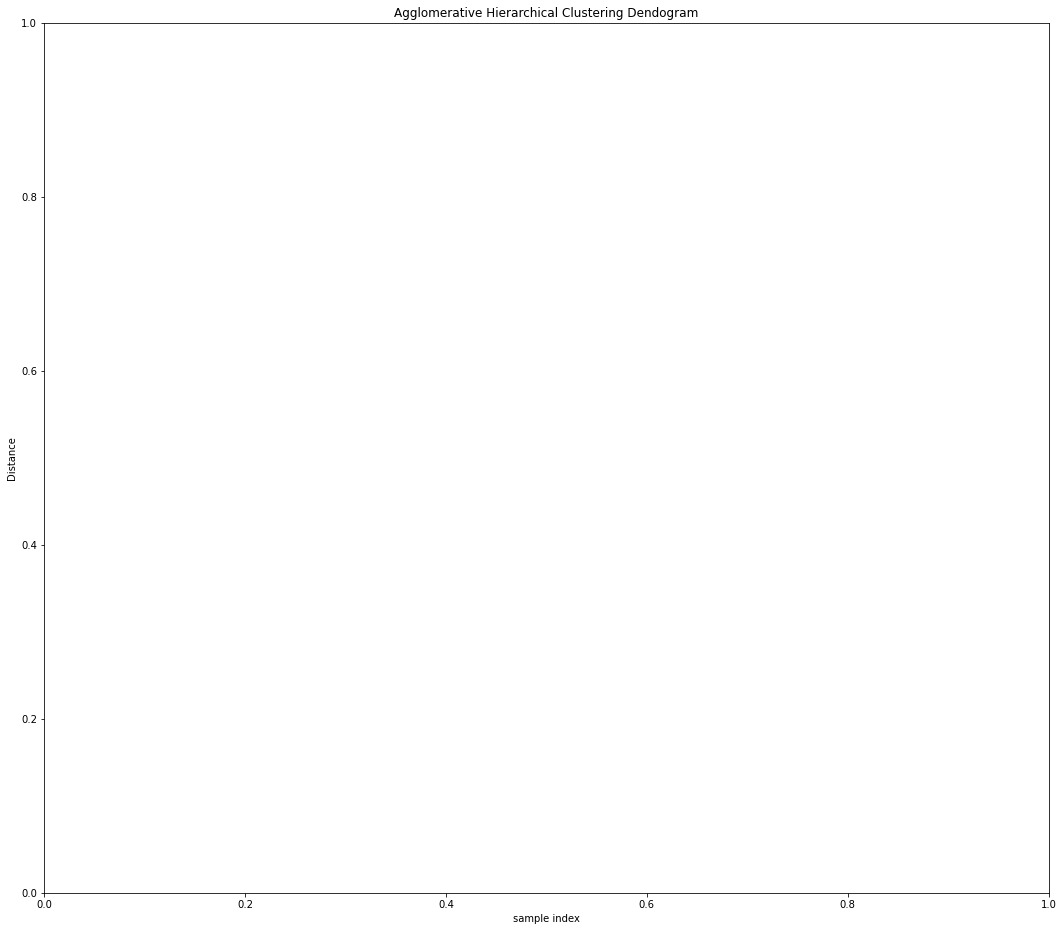

In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(linkage(X_std, 'ward'), leaf_rotation=90.0, p=4,
           color_threshold=52, leaf_font_size=10, truncate_mode='level')
plt.tight_layout()

# PCA 

In [118]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_sd_pca = pca.fit_transform(X_std)

In [119]:
def scree_plot(pca):
    
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
     
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

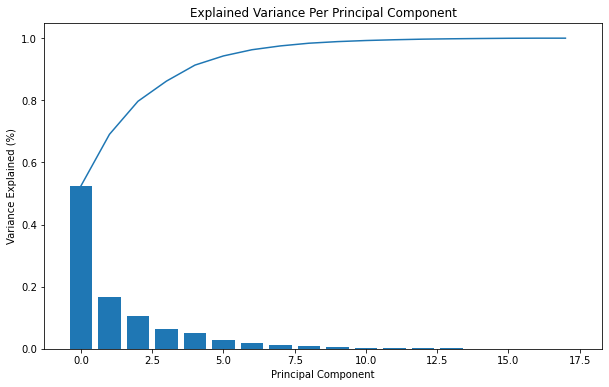

In [120]:
scree_plot(pca)

In [121]:
pca = PCA(n_components=5)
X_train_sd_pca = pca.fit_transform(X_std)

In [122]:
def pca_weights(pca, i):
    weight_map = {}
    for counter, feature in enumerate(X_std.columns):
        weight_map[feature] = pca.components_[i][counter]
        
    return weight_map

In [123]:
pca_weights(pca, 0)

{'compactness': 0.2744474283351019,
 'circularity': 0.2940035998050924,
 'distance_circularity': 0.3043802176185524,
 'radius_ratio': 0.26888859985779934,
 'pr.axis_aspect_ratio': 0.08301999139762212,
 'max.length_aspect_ratio': 0.09848254710887545,
 'scatter_ratio': 0.31668894834247874,
 'elongatedness': -0.3132050481970881,
 'pr.axis_rectangularity': 0.31361222920660015,
 'max.length_rectangularity': 0.28128567161562773,
 'scaled_variance': 0.3091615648949778,
 'scaled_variance.1': 0.3141635057225788,
 'scaled_radius_of_gyration': 0.27033732215565676,
 'scaled_radius_of_gyration.1': -0.025603692268428263,
 'skewness_about': 0.039679954778737966,
 'skewness_about.1': 0.06316000745835498,
 'skewness_about.2': 0.030941034200192542,
 'hollows_ratio': 0.07936612902583425}

In [124]:
pca_weights(pca, 1)

{'compactness': -0.1271059887944884,
 'circularity': 0.13443032072534292,
 'distance_circularity': -0.07214483507546757,
 'radius_ratio': -0.17641624964376526,
 'pr.axis_aspect_ratio': -0.09876335313761998,
 'max.length_aspect_ratio': 0.03020685147127218,
 'scatter_ratio': 0.0443899401998711,
 'elongatedness': 0.015253970969009285,
 'pr.axis_rectangularity': 0.057230604995585854,
 'max.length_rectangularity': 0.12032438111613904,
 'scaled_variance': 0.061909677146255594,
 'scaled_variance.1': 0.04802109910186657,
 'scaled_radius_of_gyration': 0.21016970384016184,
 'scaled_radius_of_gyration.1': 0.4937937968848966,
 'skewness_about': -0.05626019085974891,
 'skewness_about.1': -0.12103542584797908,
 'skewness_about.2': -0.544491702718638,
 'hollows_ratio': -0.5388816502756663}

In [ ]:
X_train_sd_pca

In [125]:

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X_train_sd_pca)
df['labels_ward'] = model.labels_
#linkage.append('ward')
#score.append(silhouette_score(X_std, model.labels_))
silhouette_score(X_train_sd_pca, model.labels_)

0.31333397372429067

In [126]:
df['labels_pca'] = model.labels_

In [127]:
df['labels_pca'].value_counts()

2    300
1    259
0    254
Name: labels_pca, dtype: int64

In [128]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
model.fit(X_std)
df['labels_single'] = model.labels_
linkage_method.append('single')
score.append(silhouette_score(X_std, model.labels_))
silhouette_score(X_std, model.labels_)

0.534469978967822

In [129]:
df['labels_pca_single'] = model.labels_

In [130]:
df['labels_pca_single'].value_counts()

1    805
0      5
2      3
Name: labels_pca_single, dtype: int64